In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

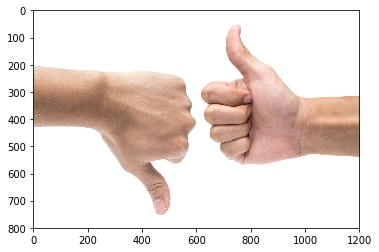

In [5]:
image = cv2.imread("Images/thumbs_up_down.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

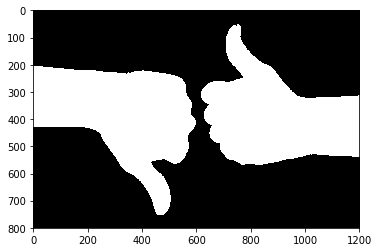

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")

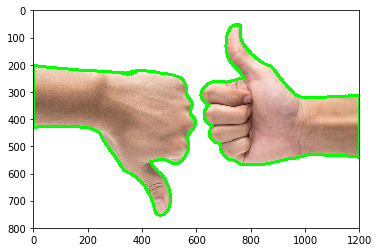

In [10]:
# Find contours from thresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 10)

plt.imshow(contours_image)

## Contour Features

### Orientation

In [13]:
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    angles = []
    
    for contour in contours:
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    
    return angles


# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [0.0, 136.5731658935547, 90.0, 90.0, 90.0, 0.0, 126.1881332397461, 99.21747589111328]


### Bounding Rectangle

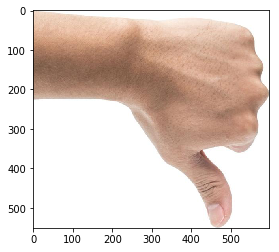

In [16]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    ## Detect the bounding rectangle of the left hand contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
    
    ## Crop the image using the dimensions of the bounding rectangle
    cropped_image = cropped_image[y: y + h, x: x + w] 
    
    return cropped_image

selected_contour = contours[1] # Select left hand

if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)